# Assessment 1

### Below we read in the data to be used for the assessment

We provide two datasets for the assignment which give the cytokine response to the bacterium Haemophilus influenzae (abbreviated to Hin) and the virus (rhonovirus: RV16). The columns are 28 Cytokine levels and the rows are 307 children. We also give the cluster labels of the children based on a Gaussian Mixture Model (GMM) fitted to each dataset independently. 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import visualisation # Python functions from the PCA lab
import clustering # Python functions for this lab
import plotly
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

### Read in the raw data for Hin and take a look at the range for each variable

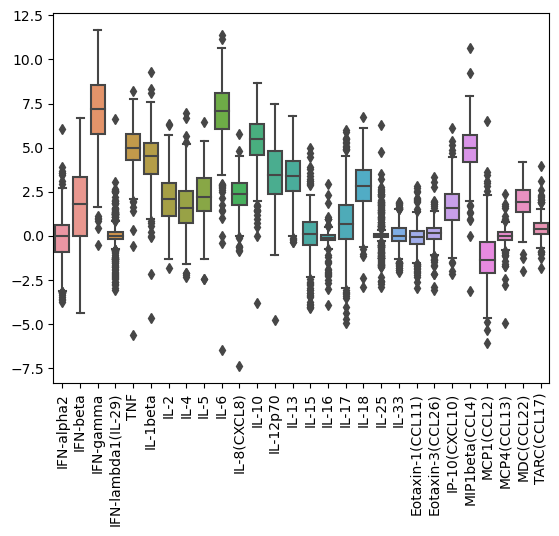

In [2]:
unscaled_data_Hin= pd.read_csv('Year11_imputedData_mediaNormalised_HinGMM.csv',index_col=1)
unscaled_data_Hin = unscaled_data_Hin.drop('Subject',axis=1)
labels_Hin = unscaled_data_Hin.index

ax = sns.boxplot(data=unscaled_data_Hin)
_= ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### The scales are highly variable so we create a scaled version of the data for the lab

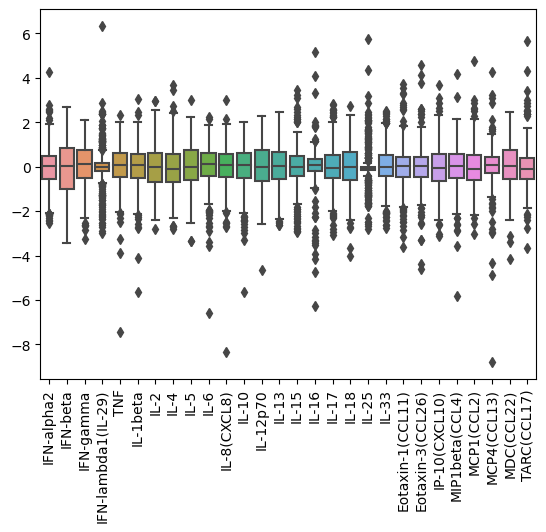

In [4]:
from sklearn import preprocessing
X = unscaled_data_Hin.copy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
data_Hin = pd.DataFrame(X_scaled,index=X.index,columns=X.columns)

ax = sns.boxplot(data=data_Hin)
_= ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [5]:
data_Hin

,IFN-alpha2,IFN-beta,IFN-gamma,IFN-lambda1(IL-29),TNF,IL-1beta,IL-2,IL-4,IL-5,IL-6,...,IL-25,IL-33,Eotaxin-1(CCL11),Eotaxin-3(CCL26),IP-10(CXCL10),MIP1beta(CCL4),MCP1(CCL2),MCP4(CCL13),MDC(CCL22),TARC(CCL17)
GMM cluster,,,,,,,,,,,,,,,,,,,,,
GMM1,1.503603,1.256221,-0.601669,-8.500908e-01,-1.737561,-1.420854,0.617890,-0.796591,-0.838789,-2.006369,...,-1.095196e-01,-3.814386e-01,-0.369757,-0.867168,-0.754488,-1.851714,-0.475232,0.124035,-1.392152,-0.625078
GMM3,-0.003753,1.072071,1.472088,-1.095443e+00,0.989467,-0.328290,0.476266,0.934953,1.242735,0.944053,...,-1.095196e-01,-3.317549e-02,0.499834,-0.187366,1.127348,1.076475,1.680332,0.500721,-0.162630,-0.240689
GMM4,-0.496414,-0.012829,-0.791193,-4.320800e-17,0.150664,0.237681,-1.294406,-0.193068,0.178672,0.822007,...,-2.595784e-17,-1.929443e-16,0.119965,0.175758,-0.899424,-0.053764,-0.619301,-0.190147,0.859593,-0.014404
GMM2,1.097034,1.277900,0.895757,-8.067183e-02,0.037885,0.011337,1.593739,0.969185,1.474702,-0.506962,...,-5.824619e-01,7.588040e-02,-0.299584,-1.209826,0.985143,0.220415,-1.025271,0.894467,-1.379653,-0.689467
GMM4,0.341437,2.298866,-0.637790,9.968737e-01,-0.137261,-0.316477,0.883978,0.132608,-0.705996,-0.307547,...,-1.095196e-01,8.053004e-01,-0.445864,0.442372,0.861884,0.041046,-0.550648,0.242490,0.491696,0.527937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GMM4,-0.543822,0.355613,-0.564927,-2.766285e-02,-1.158148,-0.963132,-1.250817,-1.107141,-0.764692,-0.547064,...,-1.095196e-01,7.498689e-01,0.087735,-0.066806,-0.846006,-0.942175,-0.711932,-0.259515,-0.649206,-0.669060
GMM2,-1.912819,-0.990192,0.818808,-2.144604e-01,0.865026,0.173570,-1.643174,-0.091690,0.543716,0.069571,...,-1.095196e-01,-2.627173e+00,-0.181630,-0.562921,0.014417,-0.265774,0.569855,-0.251761,-0.210790,1.076775
GMM4,0.145645,-0.990192,0.205121,3.915212e-01,-0.791358,-0.591846,-0.559559,0.594237,0.503848,-0.272362,...,-1.095196e-01,-3.317549e-02,-0.468756,-0.715726,-0.698955,-0.142244,-1.103423,0.457701,-1.256652,-0.301375


### Read in the raw data for RV16 and take a look at the range for each variable

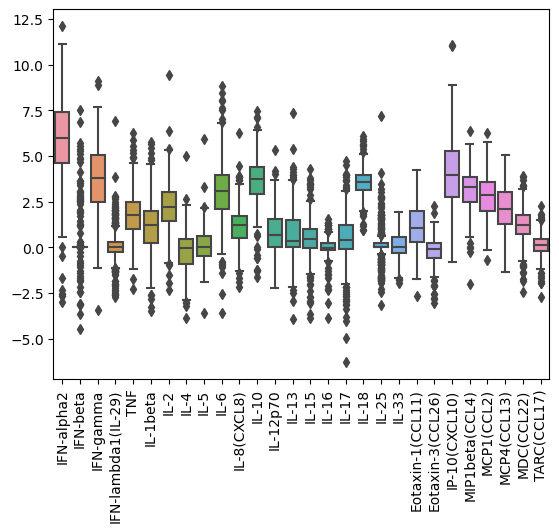

In [6]:
unscaled_data_RV16= pd.read_csv('Year11_imputedData_mediaNormalised_RV16GMM.csv',index_col=1)
unscaled_data_RV16 = unscaled_data_RV16.drop('Subject',axis=1)
labels_RV16 = unscaled_data_RV16.index

ax = sns.boxplot(data=unscaled_data_RV16)
_= ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### The scales are again highly variable so we create a scaled version of the data for the lab

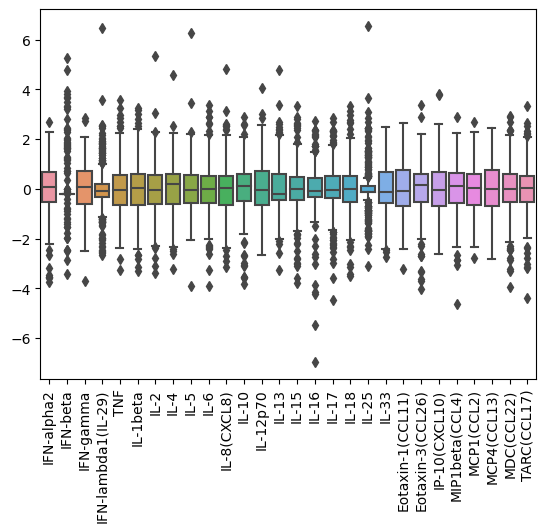

In [7]:
from sklearn import preprocessing
X = unscaled_data_RV16.copy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
data_RV16 = pd.DataFrame(X_scaled,index=X.index,columns=X.columns)

ax = sns.boxplot(data=data_RV16)
_= ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [8]:
data_RV16

,IFN-alpha2,IFN-beta,IFN-gamma,IFN-lambda1(IL-29),TNF,IL-1beta,IL-2,IL-4,IL-5,IL-6,...,IL-25,IL-33,Eotaxin-1(CCL11),Eotaxin-3(CCL26),IP-10(CXCL10),MIP1beta(CCL4),MCP1(CCL2),MCP4(CCL13),MDC(CCL22),TARC(CCL17)
GMM cluster,,,,,,,,,,,,,,,,,,,,,
GMM6,0.096131,-0.206974,-0.263077,0.358442,-0.386959,-0.186112,-0.725763,-0.369245,0.120075,-0.846300,...,0.762442,0.359021,-1.047485,-2.023544,-1.633128,-1.162466,-2.032443,-1.952089,-0.112818,-0.908488
GMM5,-0.197315,-0.206974,-0.000287,-1.135625,0.133078,-0.033928,-0.719644,0.311718,0.712870,0.178149,...,-0.136924,0.440445,-0.168360,-0.672744,-0.049254,0.290066,-0.391447,0.357336,-0.227432,-0.294758
GMM4,-1.600683,-0.206974,-1.644973,0.000040,0.376830,0.635737,-3.088445,-0.860519,0.968657,1.428345,...,0.000029,0.000003,0.562106,0.464697,-1.426178,-0.021004,-1.019905,-1.235916,1.178193,-0.027672
GMM6,0.346862,-0.206974,-0.222183,0.361938,-0.553467,0.416700,-0.077300,0.435833,0.646532,-0.795004,...,0.861130,-0.130866,-0.447838,-0.128459,0.233212,-0.153660,-0.727419,-0.102224,-0.682962,-0.096018
GMM4,-1.580557,-0.206974,-1.200764,-0.082712,1.766908,1.485935,0.638021,-1.065327,-0.065545,1.486710,...,0.343669,-0.695056,0.233868,0.121203,-0.904391,1.105448,-0.352506,-1.770902,1.892553,-0.180644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GMM6,0.352594,-0.206974,-0.020994,1.463217,-0.571416,-1.400902,-0.404148,0.543599,-0.608268,0.079940,...,-0.136924,-0.190524,-0.565746,-1.501181,-0.513822,0.232554,-0.206459,-0.760364,-0.992106,-0.241310
GMM5,0.404651,-0.206974,1.912705,-0.490047,0.545582,0.626993,0.143473,-1.837443,-0.065545,0.898272,...,0.987284,-2.763171,1.166424,-1.645560,0.441569,0.175495,0.091904,1.318497,0.607832,2.223438
GMM6,0.479339,-0.206974,0.428106,-0.376122,-1.120059,-1.203655,-0.969314,0.587725,0.461443,-0.179926,...,-0.136924,1.332212,-1.170914,-1.472277,-0.404095,0.283284,-0.856856,-1.078883,-1.399708,-3.028128


### (1)
a) Run PCA on the data.
b) Show the cumulative plot of eigenvalues and state how many principal components are required to explain 80% of variation in the data.
c) Plot the 2D projection of the data using the first two principal components. Show the factor loading vectors on the plot to illustrate how different cytokines contribute to the two principal components (show the top 10).


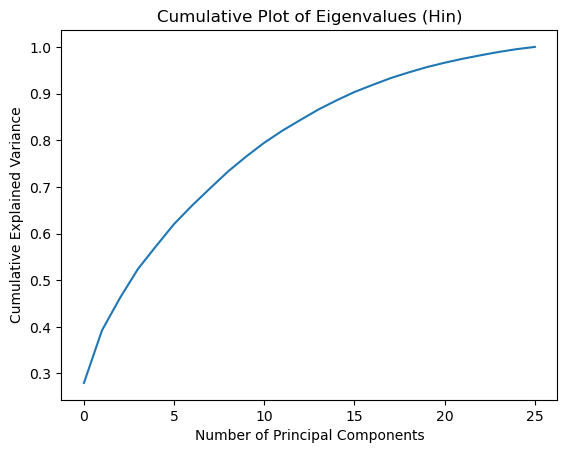

12 components required to explain 80% of variation in Hin dataset


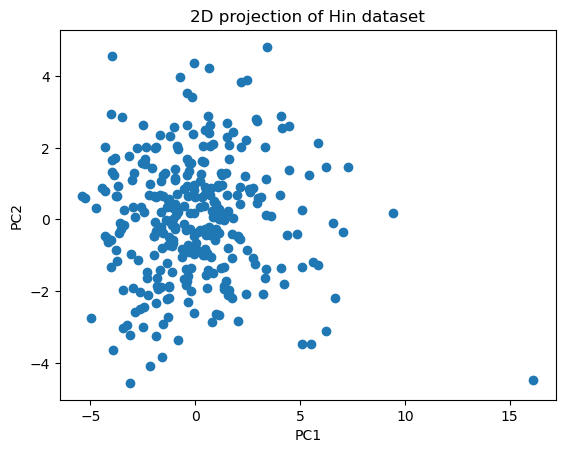

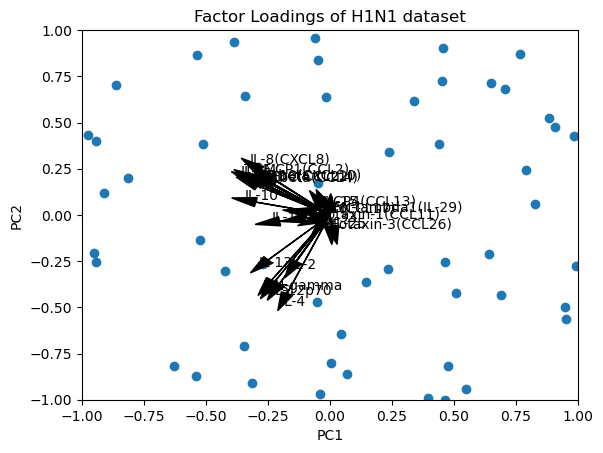

In [54]:
# Extract the cytokine names
Hin_cytokines = data_Hin.columns[2:]

# Extract the data values
data_Hin_X = data_Hin.iloc[:, 2:].values

# Perform PCA
data_Hin_X_pca = PCA()
data_Hin_X_pca.fit(data_Hin_X)

# Plot the cumulative plot of eigenvalues for Hin dataset
plt.plot(np.cumsum(data_Hin_X_pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Plot of Eigenvalues (Hin)')
plt.show()

# Determine the number of components required to explain 80% of variance
n_components_80 = np.where(cum_var >= 0.8)[0][0] + 1
print(f'{n_components_80} components required to explain 80% of variation in Hin dataset')

# Project the data onto the first two principal components
data_Hin_X_pca = data_Hin_X_pca.transform(data_Hin_X)[:, :2]

# Plot the 2D projection of the data
plt.scatter(data_Hin_X_pca[:, 0], data_Hin_X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D projection of Hin dataset')
plt.show()

# Plot the factor loadings of the first two principal components
plt.scatter(data_Hin_X_pca[:, 0], data_Hin_X_pca[:, 1])
for i, cytokine in enumerate(cytokines):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, cytokine)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Factor Loadings of H1N1 dataset')
plt.show()

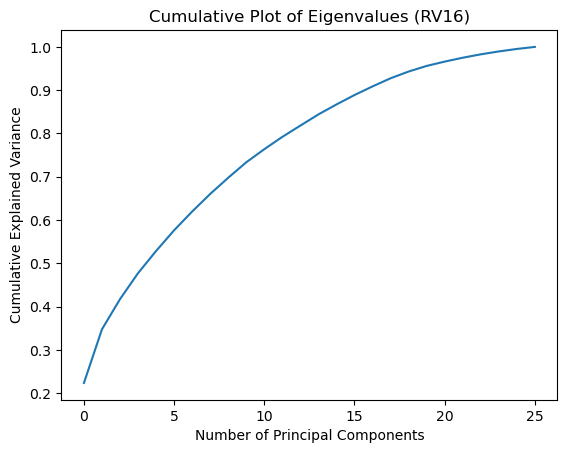

12 components required to explain 80% of variation in RV16 dataset


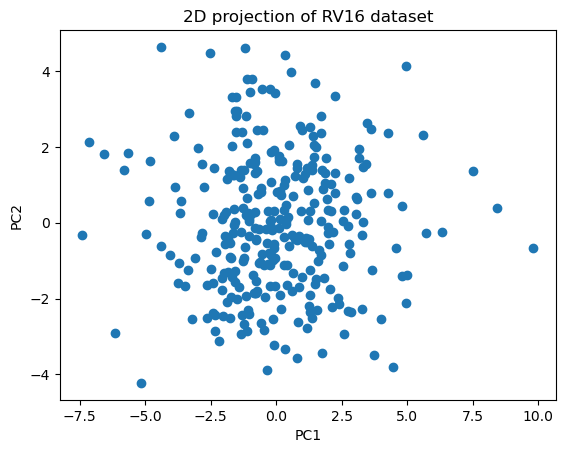

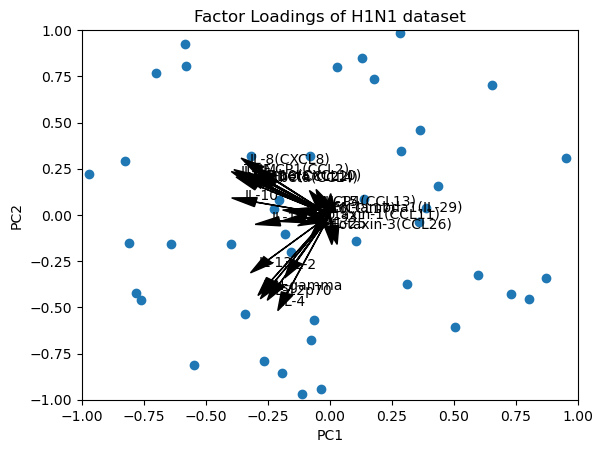

In [55]:
# Extract the cytokine names
RV16_cytokines = data_RV16.columns[2:]

# Extract the data values
data_RV16_X = data_RV16.iloc[:, 2:].values

# Perform PCA
data_RV16_X_pca = PCA()
data_RV16_X_pca.fit(data_RV16_X)

# Plot the cumulative plot of eigenvalues for RV16 dataset
plt.plot(np.cumsum(data_RV16_X_pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Plot of Eigenvalues (RV16)')
plt.show()

# Determine the number of components required to explain 80% of variance
n_components_80 = np.where(cum_var >= 0.8)[0][0] + 1
print(f'{n_components_80} components required to explain 80% of variation in RV16 dataset')

# Project the data onto the first two principal components
data_RV16_X_pca = data_RV16_X_pca.transform(data_RV16_X)[:, :2]

# Plot the 2D projection of the data
plt.scatter(data_RV16_X_pca[:, 0], data_RV16_X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D projection of RV16 dataset')
plt.show()

# Plot the factor loadings of the first two principal components
plt.scatter(data_RV16_X_pca[:, 0], data_RV16_X_pca[:, 1])
for i, cytokine in enumerate(cytokines):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, cytokine)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Factor Loadings of H1N1 dataset')
plt.show()

### (2)
a) Use k-means clustering to cluster the children based on their cytokine levels. Use the distortion elbow method to select the number of clusters (code provided in the solutions notebook of the clustering lab).
b) Compare your clustering with the GMM cluster labels provided by visualising clusters within a 2D PCA plot and by using a crosstab table. Do you find similar clusters in the data? Which clusters agree well, and which ones don't?

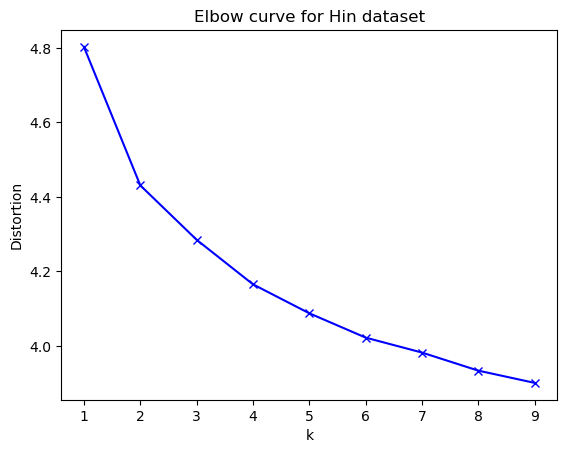

In [56]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_Hin_X)
    kmeanModel.fit(data_Hin_X)
    distortions.append(sum(np.min(cdist(data_Hin_X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve for Hin dataset')
plt.show()

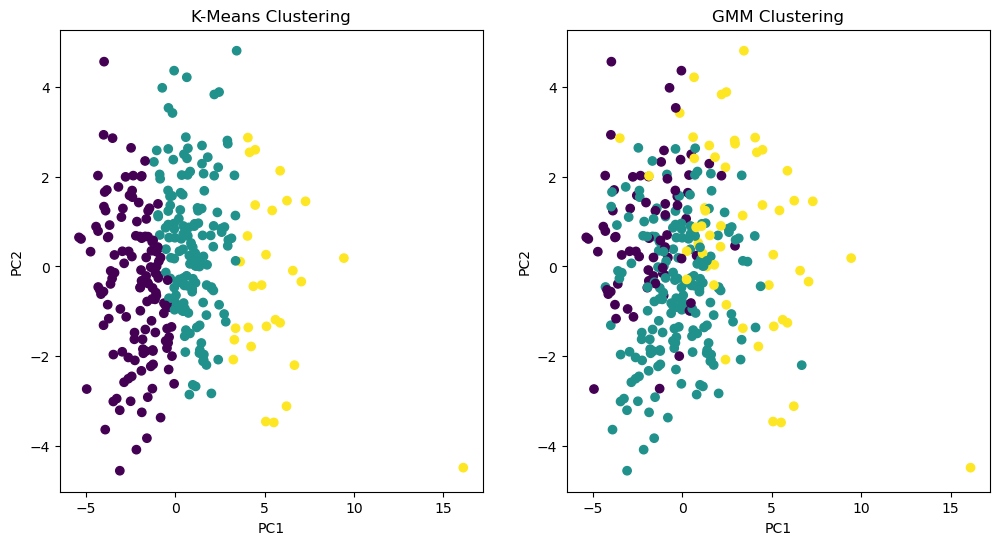

col_0   0   1   2
row_0            
0      50  83   2
1      23  90  30
2       0   7  22


In [57]:
# Fit a Gaussian Mixture Model to the data
gmm_hin = GaussianMixture(n_components=3, random_state=0)
gmm_hin.fit(data_Hin_X)

# Extract the GMM cluster labels
gmm_labels = gmm_hin.predict(data_Hin_X)

# Cluster the data using k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_Hin_X)

# Extract the k-means cluster labels
kmeans_labels = kmeans.labels_

# Plot the 2D projection of the data with k-means and GMM cluster labels
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(data_Hin_X_pca[:, 0], data_Hin_X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('K-Means Clustering')

ax[1].scatter(data_Hin_X_pca[:, 0], data_Hin_X_pca[:, 1], c=gmm_labels, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GMM Clustering')

plt.show()

# Create a crosstab table to compare the cluster labels
crosstab = pd.crosstab(kmeans_labels, gmm_labels)
print(crosstab)

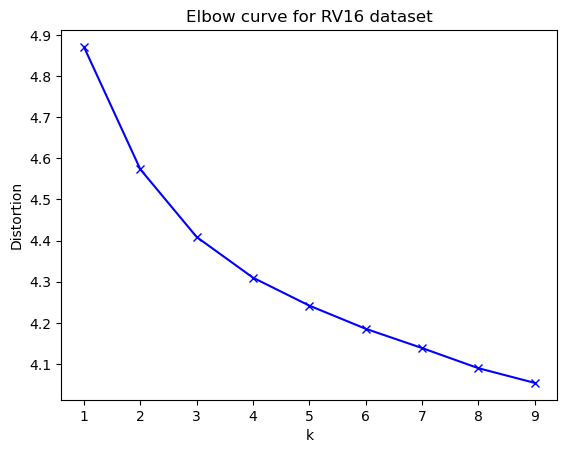

In [58]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_RV16_X)
    kmeanModel.fit(data_RV16_X)
    distortions.append(sum(np.min(cdist(data_RV16_X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve for RV16 dataset')
plt.show()

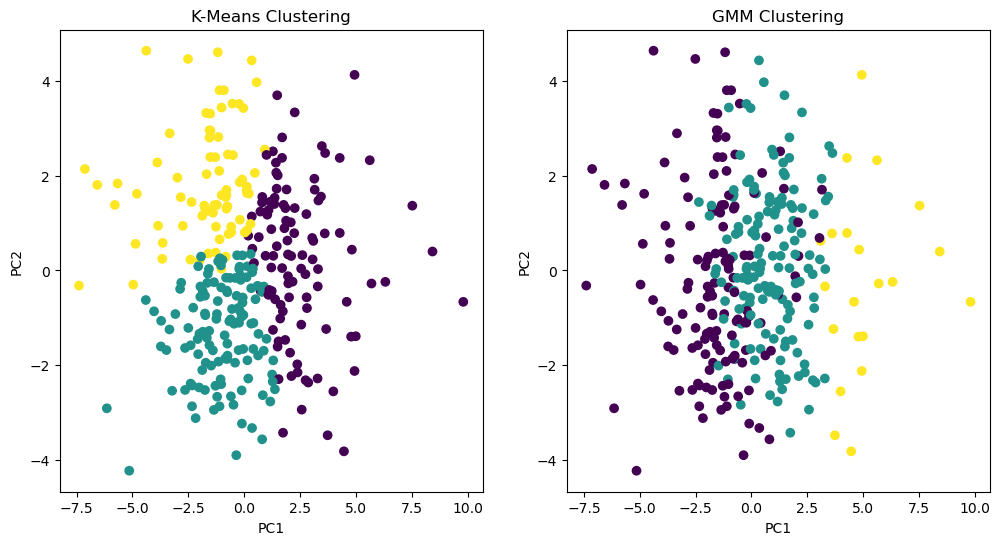

col_0   0   1   2
row_0            
0      10  73  21
1      79  47   0
2      50  27   0


In [59]:
# Fit a Gaussian Mixture Model to the data
gmm_RV16 = GaussianMixture(n_components=3, random_state=0)
gmm_RV16.fit(data_RV16_X)

# Extract the GMM cluster labels
gmm_labels = gmm_RV16.predict(data_RV16_X)

# Cluster the data using k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_RV16_X)

# Extract the k-means cluster labels
kmeans_labels = kmeans.labels_

# Plot the 2D projection of the data with k-means and GMM cluster labels
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(data_RV16_X_pca[:, 0], data_RV16_X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('K-Means Clustering')

ax[1].scatter(data_RV16_X_pca[:, 0], data_RV16_X_pca[:, 1], c=gmm_labels, cmap='viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GMM Clustering')

plt.show()

# Create a crosstab table to compare the cluster labels
crosstab = pd.crosstab(kmeans_labels, gmm_labels)
print(crosstab)

### (3)
a) Rank the cytokines based on their contribution to the first principal component (rank by magnitude of entries in the factor loading matrix, ignoring the sign).
b) Use k-means clustering to cluster the cytokines based on their responses across different children. Use the distortion elbow method to select the number of clusters (hint: to cluster features rather than data points you can transpose your dataframe using data_transposed = data.T)

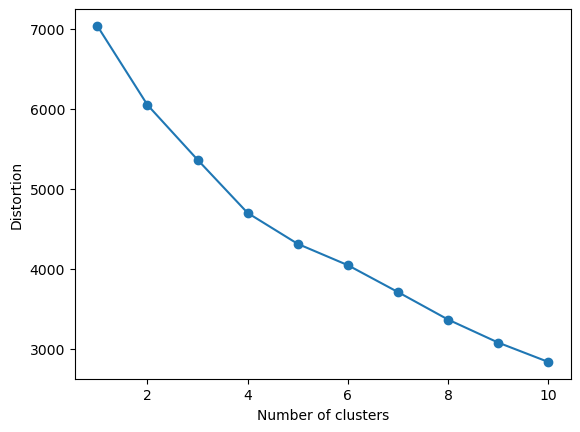

    Cytokine  Cluster
0       GMM1        1
1       GMM3        0
2       GMM4        2
3       GMM2        0
4       GMM4        2
..       ...      ...
302     GMM4        1
303     GMM2        0
304     GMM4        2
305     GMM1        1
306     GMM1        1

[307 rows x 2 columns]


In [72]:
# For Hin dataset
hin_pca = PCA().fit(data_Hin)
hin_factor_loadings = hin_pca.components_.T * np.sqrt(hin_pca.explained_variance_)
hin_pc1_loadings = hin_factor_loadings[:, 0]
hin_cytokine_ranks = sorted(zip(np.abs(hin_pc1_loadings), Hin_cytokines), reverse=True)
hin_data_transposed = data_Hin.T
hin_distortions = []

for i in range(1, 11):
	hin_kmeans = KMeans(n_clusters=i, random_state=0)
	hin_kmeans.fit(hin_data_transposed)
	hin_distortions.append(hin_kmeans.inertia_)

plt.plot(range(1, 11), hin_distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# Get the cytokine names
Hin_cytokines = list(hin_data_transposed.columns)

# Cluster the cytokines based on their responses across different children
hin_kmeans = KMeans(n_clusters=3, random_state=0)
hin_kmeans.fit(hin_data_transposed.T)

# Create a dataframe to store the cytokine clusters
hin_cytokine_clusters = pd.DataFrame({'Cytokine': Hin_cytokines, 'Cluster': hin_kmeans.labels_})
print(hin_cytokine_clusters)

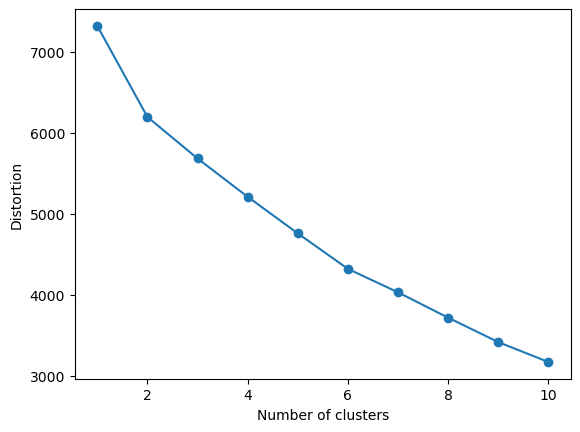

    Cytokine  Cluster
0       GMM6        1
1       GMM5        2
2       GMM4        2
3       GMM6        1
4       GMM4        2
..       ...      ...
302     GMM6        1
303     GMM5        0
304     GMM6        1
305     GMM4        2
306     GMM2        1

[307 rows x 2 columns]


In [73]:
# For RV16 dataset
RV16_pca = PCA().fit(data_RV16)
RV16_factor_loadings = RV16_pca.components_.T * np.sqrt(RV16_pca.explained_variance_)
RV16_pc1_loadings = RV16_factor_loadings[:, 0]
RV16_cytokine_ranks = sorted(zip(np.abs(RV16_pc1_loadings), RV16_cytokines), reverse=True)
RV16_data_transposed = data_RV16.T
RV16_distortions = []
for i in range(1, 11):
	RV16_kmeans = KMeans(n_clusters=i, random_state=0)
	RV16_kmeans.fit(RV16_data_transposed)
	RV16_distortions.append(RV16_kmeans.inertia_)
plt.plot(range(1, 11), RV16_distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# Get the cytokine names
RV16_cytokines = list(RV16_data_transposed.columns)

# Cluster the cytokines based on their responses across different children
RV16_kmeans = KMeans(n_clusters=3, random_state=0)
RV16_kmeans.fit(RV16_data_transposed.T)

# Create a dataframe to store the cytokine clusters
RV16_cytokine_clusters = pd.DataFrame({'Cytokine': RV16_cytokines, 'Cluster': RV16_kmeans.labels_})
print(RV16_cytokine_clusters)